<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 4)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [4]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [5]:
# type your code here
df = pd.read_csv('malaria.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'malaria.csv'

### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
# type your code here
df[df.isnull()]

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# type your code here
pd.DataFrame((df.isna().sum()/len(df)).sort_values(ascending=False), columns=['% NaNs'])

,% NaNs
Cases_Mali,0.905512
Deaths_Mali,0.905512
Cases_Spain,0.874016
Deaths_Spain,0.874016
Deaths_Senegal,0.826772
Cases_Senegal,0.803150
Cases_Nigeria,0.700787
Deaths_Nigeria,0.700787
Deaths_UnitedStates,0.551181
Cases_UnitedStates,0.425197


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [2]:
# type your code here
df.isna().sum()(ascending=False)
# nigeria 

NameError: name 'df' is not defined

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

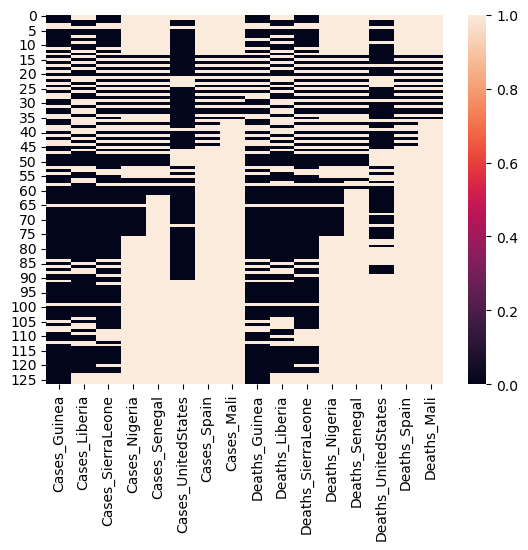

In [7]:
# type your code here
sns.heatmap(df.isnull())

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [8]:
# type your code here
df.dropna(thresh=2)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
5,2730.0,8115.0,9633.0,NaN,NaN,7.0,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,5.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
123,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
# type your code here
a = (df.isnull().sum()/len(df))*100
a[a>60].index

Index(['Cases_Nigeria', 'Cases_Senegal', 'Cases_Spain', 'Cases_Mali',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [10]:
df.drop(columns=a[a>60].index)

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_UnitedStates,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_UnitedStates
0,2776.0,NaN,10030.0,NaN,1786.0,NaN,2977.0,NaN
1,2775.0,NaN,9780.0,NaN,1781.0,NaN,2943.0,NaN
2,2769.0,8166.0,9722.0,20.0,1767.0,3496.0,2915.0,3.0
3,NaN,8157.0,NaN,10.0,NaN,3496.0,NaN,8.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
122,103.0,8.0,6.0,NaN,66.0,6.0,5.0,NaN
123,86.0,NaN,NaN,NaN,62.0,NaN,NaN,NaN
124,86.0,NaN,NaN,NaN,60.0,NaN,NaN,NaN
125,86.0,NaN,NaN,NaN,59.0,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
# type your code here
df['Cases_Liberia'].skew()

0.9491336030709361

<Axes: ylabel='Density'>

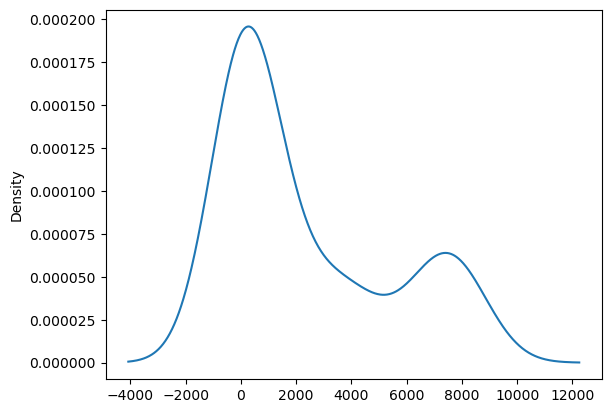

In [12]:
df['Cases_Liberia'].plot(kind='kde')

In [13]:
df['Cases_Liberia'].fillna(df['Cases_Liberia'].median())

0       516.0
1       516.0
2      8166.0
3      8157.0
4       516.0
        ...  
122       8.0
123     516.0
124     516.0
125     516.0
126     516.0
Name: Cases_Liberia, Length: 127, dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
# type your code here
df['Cases_UnitedStates'].skew()

0.4685235032170701

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [15]:
# type your code here
df['Cases_Guinea'].skew()

1.0023009483886705

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
# type your code here
df =pd.read_csv('house.csv')

In [17]:
df.skew()

C:\Users\MS\AppData\Local\Temp\ipykernel_7040\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


Rooms        0.337528
Price        2.511240
Bathroom     1.825784
Car          4.187195
Landsize    52.588949
Distance     0.016669
Bedroom      3.903058
dtype: float64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
# type your code here
df['zc'] = (df['Car'] - df['Car'].mean())/df['Car'].std()

In [19]:
len(df[(df['zc']< -3) | (df['zc']>3)])

35

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
# type your code here
df['zp'] = (df['Price'] - df['Price'].mean())/df['Price'].std()

In [21]:
len(df[(df['zp']< -3) | (df['zp']>3)])

91

<Axes: >

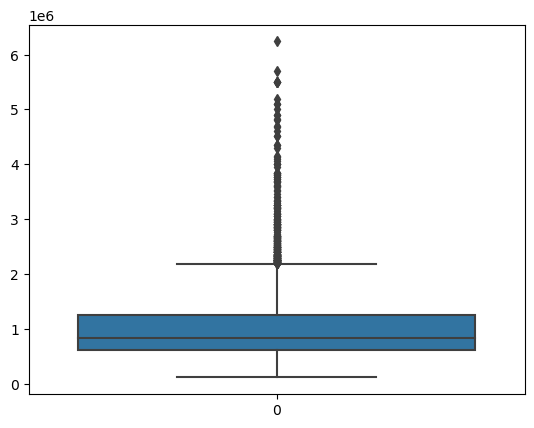

In [22]:
sns.boxplot(df['Price'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

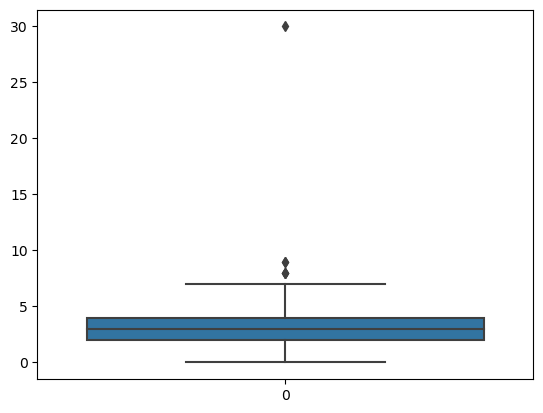

In [23]:
# type your code here
sns.boxplot(df['Bedroom'])

In [24]:
df['zb'] = (df['Bedroom'] - df['Bedroom'].mean())/df['Bedroom'].std()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# type your code here
df['zbath'] = (df['Bathroom'] - df['Bathroom'].mean())/df['Bathroom'].std()

In [26]:
len(df[(df['zbath']< -3) | (df['zbath']>3)])

71

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# type your code here
len(df[(df['zb']< -3) | (df['zb']>3)])


14

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
# type your code here
q3 = df['Distance'].quantile(.75)
q1 = df['Distance'].quantile(.25)
iqr = q3-q1
q3 = q3 +(iqr*1.5)
q1 = q1 -(iqr*1.5)

In [29]:
(df[(df['Distance']>q3) | (df['Distance']<q1) ])

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,zc,zp,zb,zbath
175,5,h,1100000,PI,Eastern Metropolitan,2,1,70,33.1,5,-0.605979,0.127813,1.944470,0.548912
292,3,h,1400000,S,Southern Metropolitan,2,2,277,31.3,4,0.423278,0.604589,0.999979,0.548912
314,2,h,1110000,S,Northern Metropolitan,1,0,255,31.7,3,-1.635236,0.143705,0.055488,-0.781767
343,3,t,667500,SP,Western Metropolitan,2,1,0,7.5,4,-0.605979,-0.559540,0.999979,0.548912
469,6,h,1856000,SP,Eastern Metropolitan,1,1,581,31.0,3,-0.605979,1.329290,0.055488,-0.781767
602,2,h,560000,S,Northern Metropolitan,2,1,347,31.9,2,-0.605979,-0.730385,-0.889003,0.548912
617,5,h,870000,S,South-Eastern Metropolitan,1,2,510,31.3,3,0.423278,-0.237716,0.055488,-0.781767
801,4,h,2500000,S,Southern Metropolitan,1,2,603,6.7,2,0.423278,2.352770,-0.889003,-0.781767
887,3,h,1130000,S,South-Eastern Metropolitan,2,2,213,6.0,2,0.423278,0.175490,-0.889003,0.548912
1032,2,u,670000,PI,Southern Metropolitan,3,2,742,31.6,2,0.423278,-0.555567,-0.889003,1.879592


In [30]:
df2 = df[(df['Distance']<q3) & (df['Distance']>q1)]

In [31]:
df2['Distance'].mean()

19.31142555438226

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: >

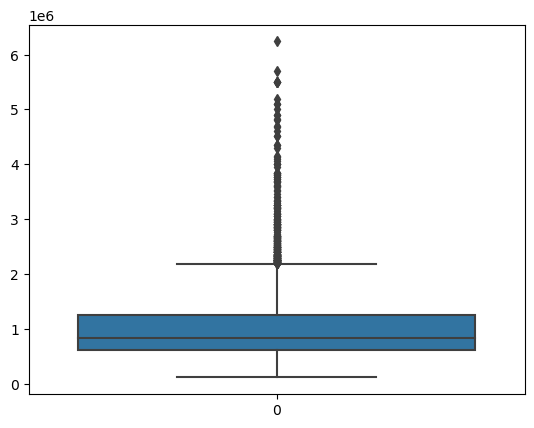

In [32]:
# type your code here
sns.boxplot(df['Price'],)

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [33]:
# type your code here
df['Dist']= pd.qcut(df['Distance'], q=3)

In [34]:
df['Dist'].replace({"(21.2, 33.1]":'a','(17.5, 21.2]':'b'},inplace=True)

In [35]:

df['Dist']

0        (21.2, 33.1]
1        (21.2, 33.1]
2        (21.2, 33.1]
3        (17.5, 21.2]
4        (17.5, 21.2]
            ...      
4761     (17.5, 21.2]
4762    (4.999, 17.5]
4763     (21.2, 33.1]
4764     (21.2, 33.1]
4765    (4.999, 17.5]
Name: Dist, Length: 4766, dtype: category
Categories (3, interval[float64, right]): [(4.999, 17.5] < (17.5, 21.2] < (21.2, 33.1]]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<Axes: xlabel='Dist', ylabel='Price'>

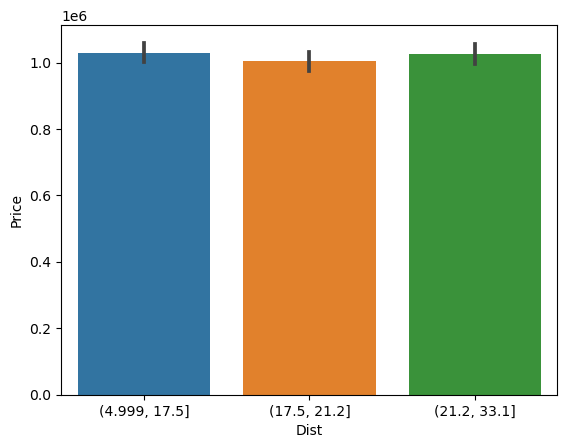

In [37]:
# type your code here
sns.barplot(x=df['Dist'],y=df['Price'])

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here
from sklearn.model_selection import train_test_split
y=df['Price'].values.reshape(-1,1)
x=df.drop(['Price'],axis=1)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)